# 20152410 배형준 머신러닝 과제8

In [1]:
# library import

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# set my local working directory

import os

directory = 'C:\\Users\\golds\\Desktop\\중앙대학교\\2020-1 4학년 1학기\\머신러닝'
os.chdir(directory)

In [8]:
# load dataset

filename = './과제8/mnist_test.csv'
mnist_test = pd.read_csv(filename, header=None)
mnist_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
class minmaxscaler:
    def __init__(self):
        self.min_value = 0
        self.max_value = 0
        
    def fit(self, X):
        self.min_value = np.min(X, axis=0)
        self.max_value = np.where(np.max(X, axis=0) == 0, 1, np.max(X, axis=0))
        
        return self
    
    def transform(self, X):
        scaled = np.zeros(X.shape)
        
        for j in range(X.shape[1]):
            scaled[:, j] = (X[:, j] - self.min_value[j]) / (self.max_value[j] - self.min_value[j])
        
        return scaled

In [39]:
label = np.array(mnist_test.iloc[:, 0])
data = np.array(mnist_test.iloc[:, 1:])

model_minmax = minmaxscaler()
model_minmax.fit(data)
data_scaled = model_minmax.transform(data)

In [98]:
K = len(np.unique(label))
n = 28
m = 28

index_list = []
label_list = []
data_scaled_list = []
data_scaled_reshape_list = [ [] for i in range(K) ]
data_scaled_array = []
data_scaled_array_mean = []

for i in range(K):
    temp = (label == i) # label이 i인 row_number
    index_list.append(temp) # index_list에 각 row_number 추가
    label_list.append(label[temp]) # label_list에 해당 라벨들 추가
    data_scaled_list.append(data_scaled[temp, :]) # data_scaled_list에 label별로 분류
    
    temp_data_scaled = data_scaled[temp, :]
    for j in range(np.sum(temp)):
        data_scaled_reshape_list[i].append(temp_data_scaled[j, :].reshape(n, m))
        
    data_scaled_array.append(np.array(data_scaled_reshape_list[i]))
    data_scaled_array_mean.append(data_scaled_array[i].mean(axis=0))

# 1. Plot the average image

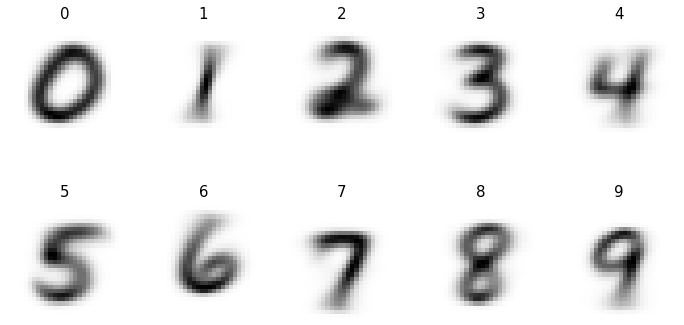

In [127]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(K):
    axes[i].imshow(data_scaled_array_mean[i], cmap='Greys', interpolation='None')
    axes[i].set_title('{}'.format(i), fontsize=15)
    axes[i].axis('off')